# Machine Learning 

Analysis of a ***student scores dataset that collects academic and personal information from 2000 students***. This dataset offers in-depth insights into student performance and related factors. Machine Learning questions that will be addressed:

***-Question 1: What are the most critical features (e.g., attendance, study time, module scores) for predicting student performance (final_score)?***

***-Question 2: Which classification model (e.g., Random Forest vs. Support Vector Machine) better predicts whether a student belongs to a high performer class or a low performance class?***

# Question 1. Regression Analysis

## 1. Data Preparation. 

### 1.1 Handling Missing Values and Dropping Irrelevant Columns

In [6]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance

In [8]:
# Importing this library to suppress the warnings
import warnings
warnings.filterwarnings('ignore')   

In [9]:
#Importing the dataset 
df_students = pd.read_csv('student performance dataset.csv')

In [10]:
df_students.shape

(2000, 17)

In [11]:
df_students.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [12]:
# Renaming the columns in df_students
df_students.rename(columns = ({'absence_days': 'absence', 'weekly_self_study_hours': 'study_time'}), 
                inplace=True)

In [13]:
df_students.head()

,id,first_name,last_name,email,gender,part_time_job,absence,extracurricular_activities,study_time,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


***I need to derive the Target Variable "Final Grade" by taking an average each student got in Math, History, Physics, Chemistry, Biology, English and Geography modules***

In [15]:
# Defining weights for subjects
weights = {
    'math_score': 1,
    'history_score': 1,
    'physics_score': 1,
    'chemistry_score': 1,
    'biology_score': 1,
    'english_score': 1,
    'geography_score': 1
}

# Calculating total weight
total_weight = sum(weights.values())

# Calculating the weighted average for each student
df_students['final_grade'] = df_students.apply(
    lambda row: sum(row[subject] * weight for subject, weight in weights.items()) / total_weight,
    axis=1
)

# Displaying updated df_students with the final grade
print(df_students[['id', 'first_name', 'last_name', 'final_grade']])

        id first_name last_name  final_grade
0        1       Paul     Casey    82.000000
1        2   Danielle  Sandoval    91.428571
2        3       Tina   Andrews    86.428571
3        4       Tara     Clark    78.714286
4        5    Anthony    Campos    74.428571
...    ...        ...       ...          ...
1995  1996       Alan  Reynolds    79.714286
1996  1997     Thomas   Gilbert    76.285714
1997  1998    Madison     Cross    82.571429
1998  1999   Brittany   Compton    80.857143
1999  2000    Natalie     Smith    88.142857

[2000 rows x 4 columns]


In [16]:
df_students.head()

,id,first_name,last_name,email,gender,part_time_job,absence,extracurricular_activities,study_time,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,final_grade
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,82.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,91.428571
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,86.428571
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,78.714286
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,74.428571


In [17]:
# Since I will focus on numeric variables I will remove the non-numeric columns like First Name, Last Name & Email, Gender, Part_Time Job, Extracurricular_Activities, Career_Aspirations
df_students = df_students.drop(columns=['first_name', 'last_name', 'email','gender','part_time_job', 'extracurricular_activities','career_aspiration'])

# Display the updated DataFrame
print(df_students.head())

   id  absence  study_time  math_score  history_score  physics_score  \
0   1        3          27          73             81             93   
1   2        2          47          90             86             96   
2   3        9          13          81             97             95   
3   4        5           3          71             74             88   
4   5        5          10          84             77             65   

   chemistry_score  biology_score  english_score  geography_score  final_grade  
0               97             63             80               87    82.000000  
1              100             90             88               90    91.428571  
2               96             65             77               94    86.428571  
3               80             89             63               86    78.714286  
4               65             80             74               76    74.428571  


In [18]:
df_students.head()

,id,absence,study_time,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,final_grade
0,1,3,27,73,81,93,97,63,80,87,82.000000
1,2,2,47,90,86,96,100,90,88,90,91.428571
2,3,9,13,81,97,95,96,65,77,94,86.428571
3,4,5,3,71,74,88,80,89,63,86,78.714286
4,5,5,10,84,77,65,65,80,74,76,74.428571


In [19]:
df_students.isnull().sum()

id                 0
absence            0
study_time         0
math_score         0
history_score      0
physics_score      0
chemistry_score    0
biology_score      0
english_score      0
geography_score    0
final_grade        0
dtype: int64

In [20]:
df_students.describe()

,id,absence,study_time,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,final_grade
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000,80.980357
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705,6.042224
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000,59.142857
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000,77.285714
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000,84.714286
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000,96.142857


***I will look at the distribution of all numeric variables to see if they follow a normal distribution or at least a distribution that is close to normal***

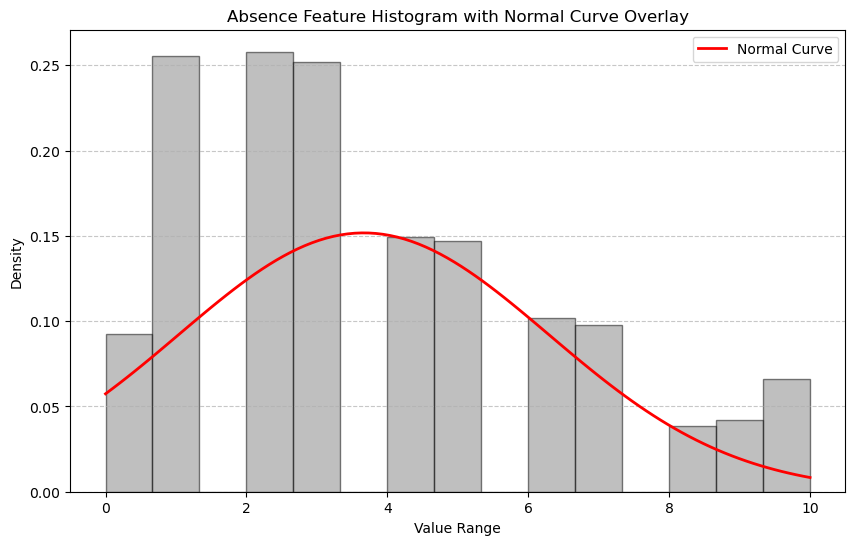

In [22]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_students['absence'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First I will calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_students['absence'])

# Then, I will create a range of x values for the normal curve
x = np.linspace(min(df_students['absence']), max(df_students['absence']), 100)

# Also, I will create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Absence Feature Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

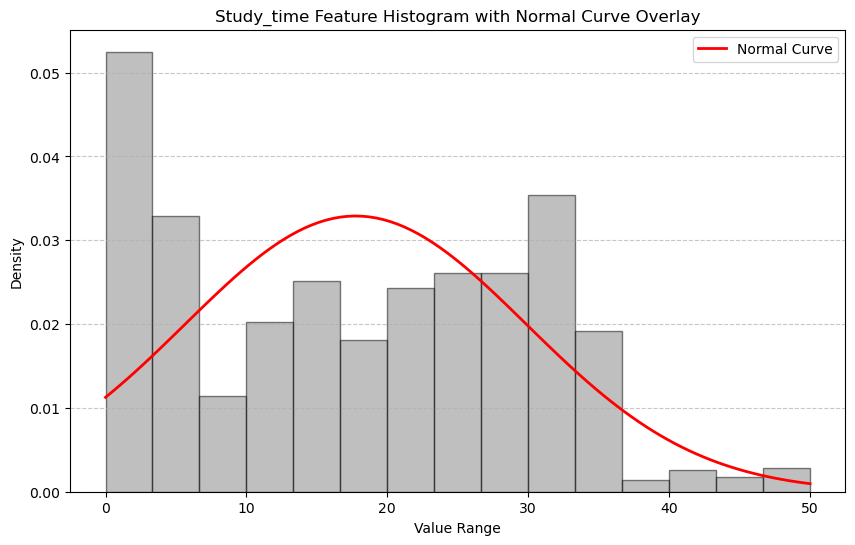

In [23]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_students['study_time'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First I will calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_students['study_time'])

# Then, I will create a range of x values for the normal curve
x = np.linspace(min(df_students['study_time']), max(df_students['study_time']), 100)

# Also, I will create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Study_time Feature Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

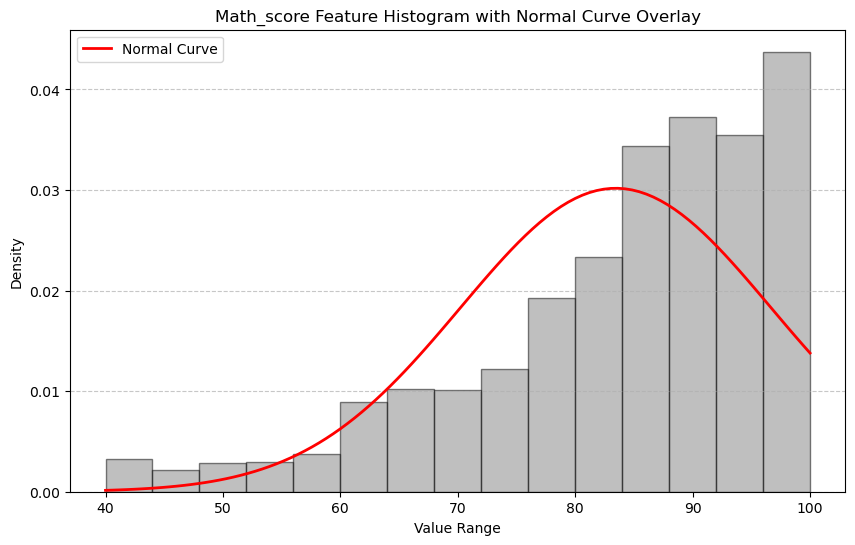

In [24]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_students['math_score'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First I will calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_students['math_score'])

# Then, I will create a range of x values for the normal curve
x = np.linspace(min(df_students['math_score']), max(df_students['math_score']), 100)

# Also, I will create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Math_score Feature Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

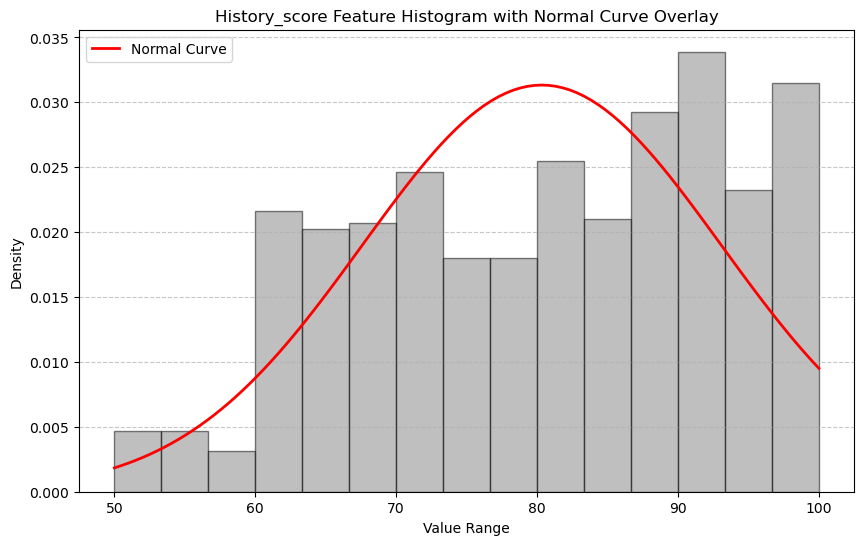

In [25]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_students['history_score'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First I will calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_students['history_score'])

# Then, I will create a range of x values for the normal curve
x = np.linspace(min(df_students['history_score']), max(df_students['history_score']), 100)

# Also, I will create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('History_score Feature Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

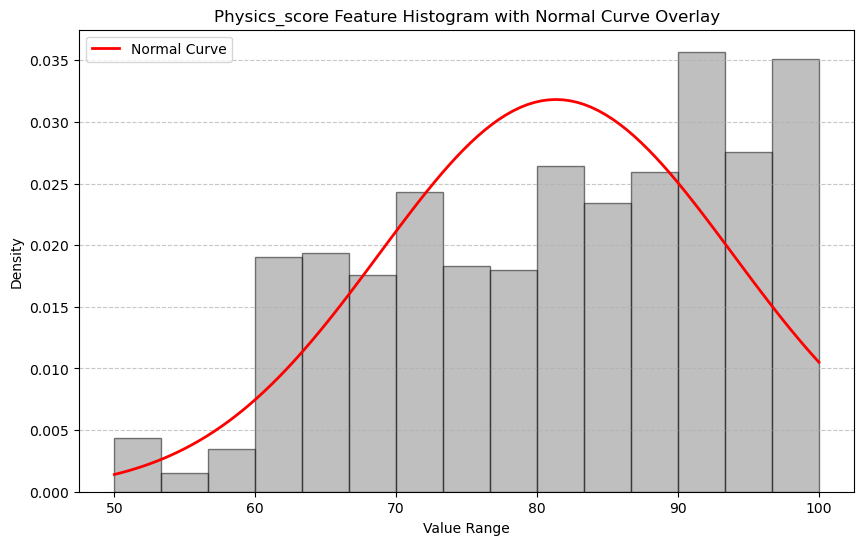

In [26]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_students['physics_score'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First I will calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_students['physics_score'])

# Then, I will create a range of x values for the normal curve
x = np.linspace(min(df_students['physics_score']), max(df_students['physics_score']), 100)

# Also, I will create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Physics_score Feature Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

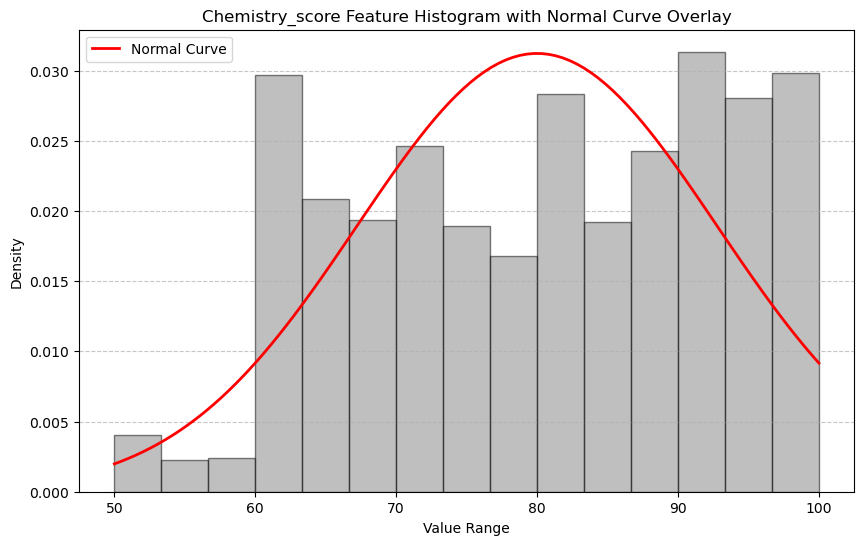

In [27]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_students['chemistry_score'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First I will calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_students['chemistry_score'])

# Then, I will create a range of x values for the normal curve
x = np.linspace(min(df_students['chemistry_score']), max(df_students['chemistry_score']), 100)

# Also, I will create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Chemistry_score Feature Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

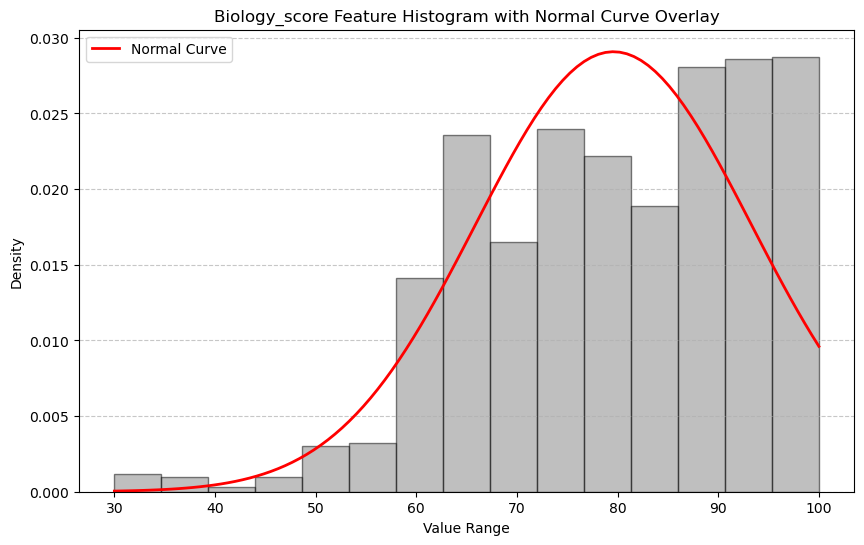

In [28]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_students['biology_score'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First I will calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_students['biology_score'])

# Then, I will create a range of x values for the normal curve
x = np.linspace(min(df_students['biology_score']), max(df_students['biology_score']), 100)

# Also, I will create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Biology_score Feature Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

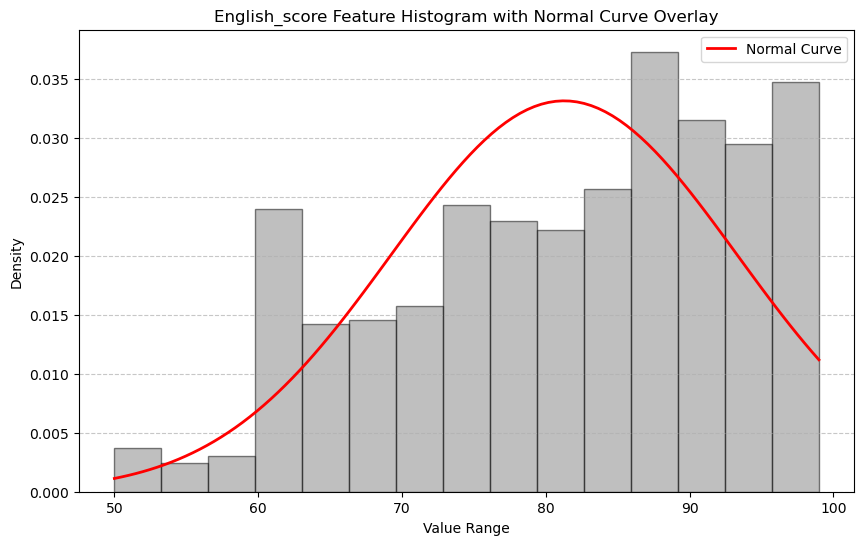

In [29]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_students['english_score'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First I will calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_students['english_score'])

# Then, I will create a range of x values for the normal curve
x = np.linspace(min(df_students['english_score']), max(df_students['english_score']), 100)

# Also, I will create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('English_score Feature Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

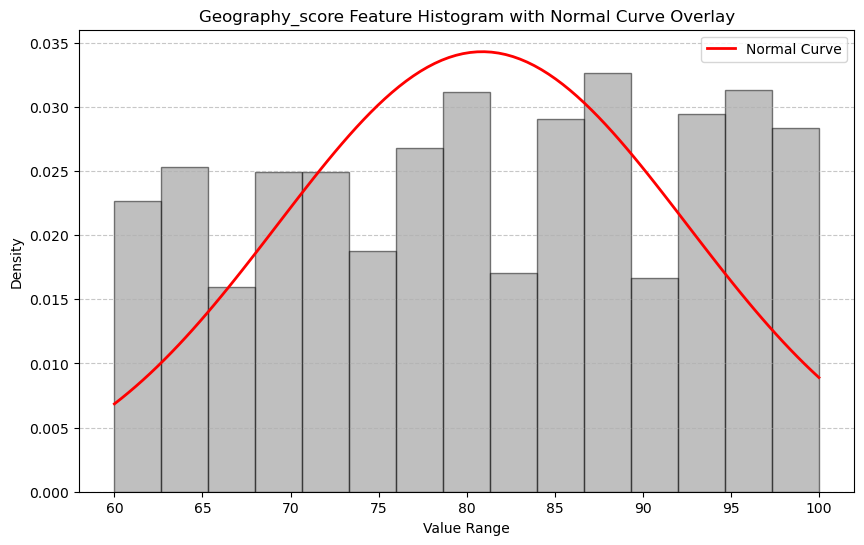

In [30]:
# Histogram  
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_students['geography_score'], bins=15, density=True, color='grey', edgecolor='black', alpha=0.5)

# First I will calculate the normal distribution parameters 
mu, std = stats.norm.fit(df_students['geography_score'])

# Then, I will create a range of x values for the normal curve
x = np.linspace(min(df_students['geography_score']), max(df_students['geography_score']), 100)

# Also, I will create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Geography_score Feature Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

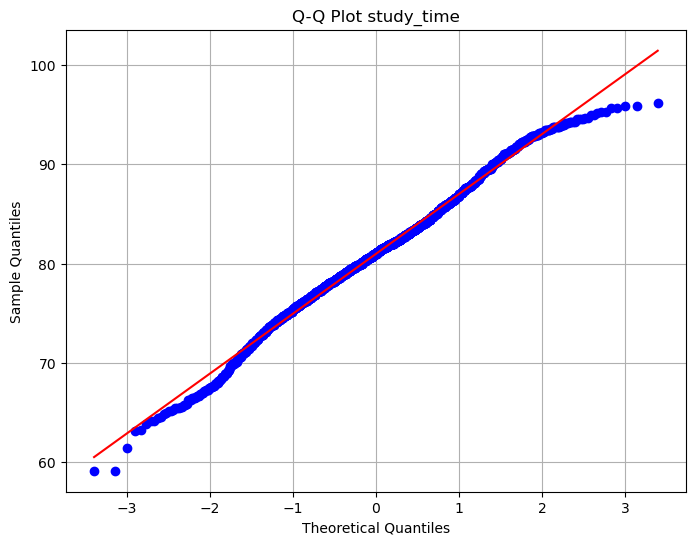

In [31]:
## Q-Q (quantile-quantile) plot
#Creating Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df_students['final_grade'], dist="norm", plot=plt)

#Adding titles and labels
plt.title('Q-Q Plot study_time')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

#Showing the plot
plt.grid()
plt.show()

Since the features are ***close to a normal distribution, I will choose standardization over normalization***. It will ensure that features have a mean of 0 and a standard deviation of 1, which can improve convergence and performance in machine learning algorithms that 1) assume Gaussian-like distributions (linear regression, logistic regression, PCA) 2) rely on distance metrics (SVM, k-NN, K-means)

In [33]:
features = ['study_time', 'absence', 'math_score', 'history_score', 'physics_score',
            'chemistry_score', 'biology_score', 'english_score', 'geography_score']
X = df_students[features]  # Select the features
y = df_students['final_grade']  # Target variable

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert back to DataFrame
X_standardized = pd.DataFrame(X_standardized, columns=features)

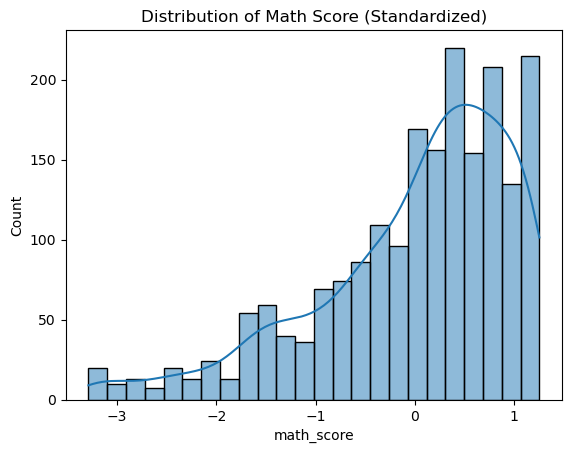

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for math_score
sns.histplot(X_standardized['math_score'], kde=True)
plt.title('Distribution of Math Score (Standardized)')
plt.show()

***As observed standardization doesn’t guarantee a perfect normal distribution***. The chart illustrates the purpose of standardization, which is to rescale the data in such a way that its mean is 0 and standard deviation is 1. However, tt doesn’t change the underlying distribution of the data itself, that is, skewness or multimodality.

Given that most machine learning models like regression, SVMs and others can work well with standardized data, even if it isn’t perfectly normal, I will choose not to perform any additional transformations for now.

## 2. Feature Selection 

Here I will define ***the most relevant features*** for predicting the target variable "Final_Grade"

For that, I will perform **1)** Correlation Analysis, to assess the correlation of each feature with final_grade. **2)** Feature Importance Assessment, using models like Random Forest Regressor to assess the importance (relevance) of each feature. **3)** Statistical Tests like mutual information.

In [39]:
features = ['study_time', 'absence', 'math_score', 'history_score', 'physics_score',
            'chemistry_score', 'biology_score', 'english_score', 'geography_score']

# Separate features and target variable
X = df_students[features]
y = df_students['final_grade']

# Normalize numeric features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

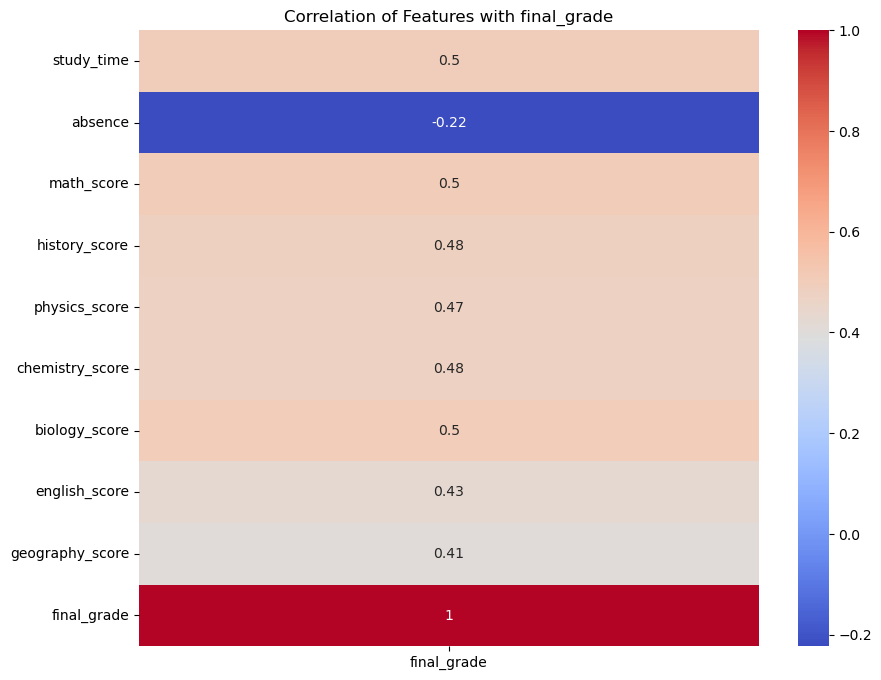

In [40]:
# Correlation Matrix
feature_names = ['study_time', 'absence', 'math_score', 'history_score', 
                 'physics_score', 'chemistry_score', 'biology_score', 
                 'english_score', 'geography_score']

# Convert normalized X_train back to a DataFrame for easier interpretation
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Correlation with final_grade
correlation_matrix = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['final_grade']], annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation of Features with final_grade')
plt.show()

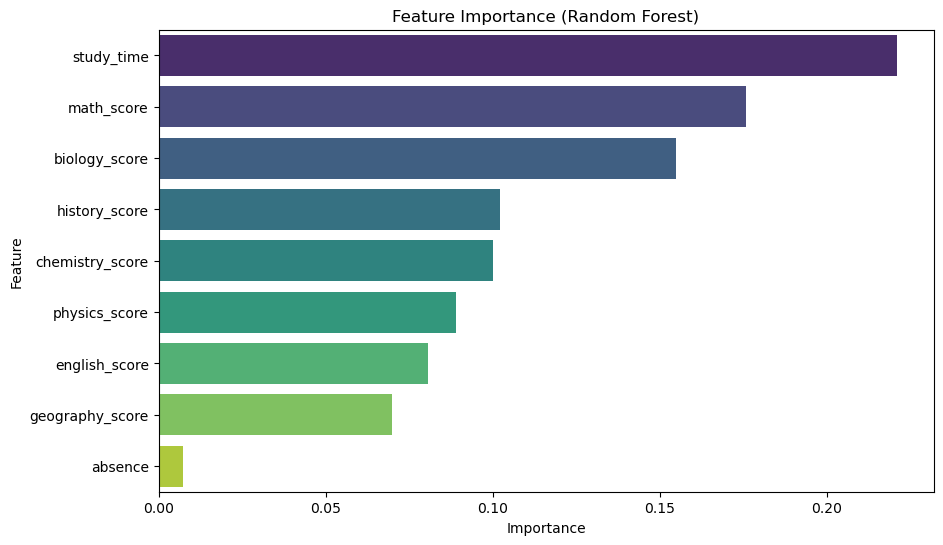

In [41]:
# Feature Importance via Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importance = rf.feature_importances_

# Visualize Feature Importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature',palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()

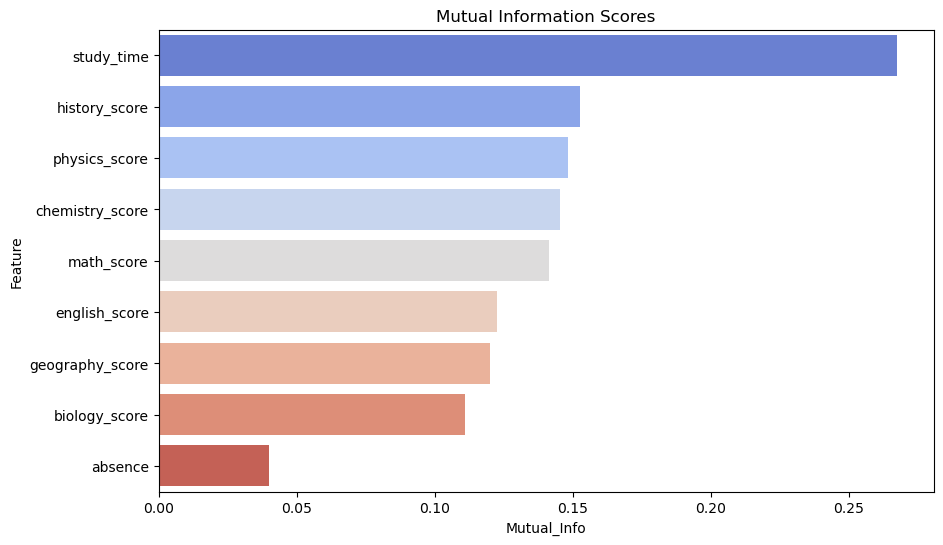

Top Features: ['study_time', 'history_score', 'physics_score', 'chemistry_score', 'math_score']


In [42]:
# Statistical Testing with Mutual Information
selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Keep all features for now
selector.fit(X_train, y_train)

mutual_info_scores = selector.scores_

# Visualize Mutual Information Scores
mutual_info_df = pd.DataFrame({'Feature': feature_names, 'Mutual_Info': mutual_info_scores})
mutual_info_df = mutual_info_df.sort_values(by='Mutual_Info', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=mutual_info_df, x='Mutual_Info', y='Feature',palette='coolwarm')
plt.title('Mutual Information Scores')
plt.show()

# Select top features
top_features = mutual_info_df.head(5)['Feature'].tolist()
print("Top Features:", top_features)

## 3. Model Selection 

I will choose Linear Regression and Random Forest Regressor models 

In [45]:
# Initializing models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Training models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Making predictions
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

## 4. Hyperparameter Tuning

I will optimize the models using GridSearchCV

In [48]:
# Defining parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Performing Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           verbose=2)

grid_search.fit(X_train, y_train)

# Printing Best Random Forest model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictiction using the best model
rf_best_preds = best_rf_model.predict(X_test)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_s

## 5. Model Evaluation 

I will evaluate both models R² and Mean Absolute Error (MAE) metrics

In [51]:
# Evaluating Linear Regression
linear_r2 = r2_score(y_test, linear_preds)
linear_mae = mean_absolute_error(y_test, linear_preds)

In [52]:
# Evaluating Random Forest
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

In [53]:
# Evaluating Best Random Forest Model
rf_best_r2 = r2_score(y_test, rf_best_preds)
rf_best_mae = mean_absolute_error(y_test, rf_best_preds)

In [54]:
# Printing the results
print("Linear Regression - R²:", linear_r2, "MAE:", linear_mae)
print("Random Forest - R²:", rf_r2, "MAE:", rf_mae)
print("Optimized Random Forest - R²:", rf_best_r2, "MAE:", rf_best_mae)

Linear Regression - R²: 1.0 MAE: 4.192202140984591e-15
Random Forest - R²: 0.9250355608083363 MAE: 1.3147357142857132
Optimized Random Forest - R²: 0.9247788332064751 MAE: 1.3088517857142863


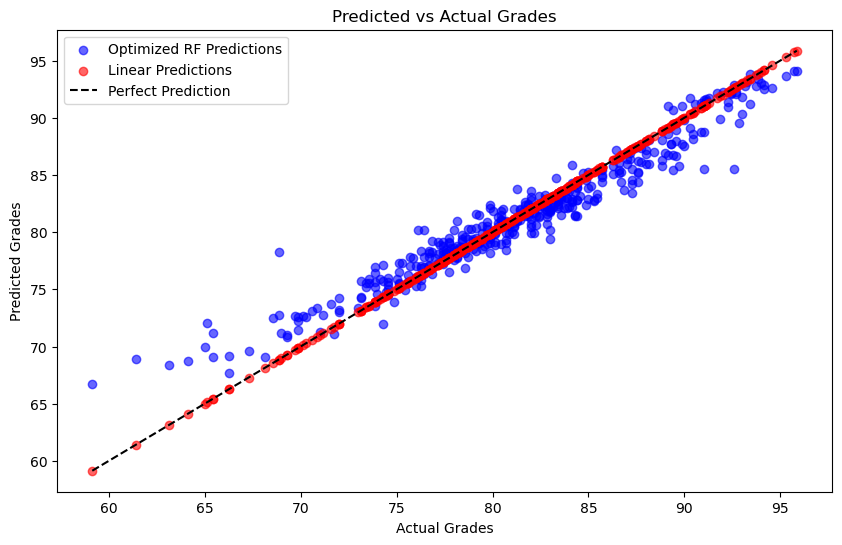

In [55]:
# Visualizing Predictions and Actual Grades
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_best_preds, alpha=0.6, color='blue', label='Optimized RF Predictions')
plt.scatter(y_test, linear_preds, alpha=0.6, color='red', label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', label='Perfect Prediction')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.legend()
plt.title('Predicted vs Actual Grades')
plt.show()

In [56]:
print("Most Important Features:")
print(feature_importance_df.head())

Most Important Features:
           Feature  Importance
0       study_time    0.220801
2       math_score    0.175667
6    biology_score    0.154900
3    history_score    0.102015
5  chemistry_score    0.100036


By looking both at the chart and the R² and MAE statistics, we can see that statistically, ***Linear Regression dominates with its perfect R² and nearly zero MAE***. However, this perfect ***R² that explains 100% of the data doesn't seem realistic*** as such a high R² is often a sign of potential overfitting or a data anomaly (like duplicate predictors or leakage of target variables into predictors). Similarly, ***MAE ≈ 4.19e-15,the Mean Absolute Error (MAE) is nearly zero, which aligns with the perfect R². Again, this suggests that the model might be suspiciously overfitting or relying on unrealistic conditions***. Such perfect metrics may not generalize well to unseen data. 

On the other hand, the ***Random Forest model explains about 92.5% of the variance in the actual grades, which is excellent for a predictive model. Also, its MAE is equal to 1.31, which means that on average, the predictions are off by about 1.31 points, which is quite low and demonstrates strong performance***. Thus, the Random Forest model provides a reliable and robust performance, balancing complexity with accuracy. Similarly, the optimized Random Forest performs nearly identically to the baseline Random Forest, with no substantial improvement from the optimization.

# Question 2. Classification

## 2.1 Defining Classification variable & Train-Test Spliting

In [60]:
df_students.head()

,id,absence,study_time,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,final_grade
0,1,3,27,73,81,93,97,63,80,87,82.000000
1,2,2,47,90,86,96,100,90,88,90,91.428571
2,3,9,13,81,97,95,96,65,77,94,86.428571
3,4,5,3,71,74,88,80,89,63,86,78.714286
4,5,5,10,84,77,65,65,80,74,76,74.428571


In [61]:
df_students.describe()

,id,absence,study_time,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,final_grade
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000,80.980357
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705,6.042224
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000,59.142857
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000,77.285714
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000,84.714286
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000,96.142857


In [62]:
# The median final_grade value for later categorization into "High" and "Low" performers
median_grade = df_students['final_grade'].median()

# Creating new target column for classification
df_students['performance_category'] = df_students['final_grade'].apply(
    lambda x: 'Low Performer' if x <= median_grade else 'High Performer'
)

# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_students['performance_category_encoded'] = label_encoder.fit_transform(df_students['performance_category'])

In [63]:
# Checking
print(df_students[['final_grade', 'performance_category', 'performance_category_encoded']].head(2000))

      final_grade performance_category  performance_category_encoded
0       82.000000       High Performer                             0
1       91.428571       High Performer                             0
2       86.428571       High Performer                             0
3       78.714286        Low Performer                             1
4       74.428571        Low Performer                             1
...           ...                  ...                           ...
1995    79.714286        Low Performer                             1
1996    76.285714        Low Performer                             1
1997    82.571429       High Performer                             0
1998    80.857143        Low Performer                             1
1999    88.142857       High Performer                             0

[2000 rows x 3 columns]


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining selected relevant features and target variable
selected_features = ['study_time', 'math_score', 'biology_score', 
                     'history_score', 'chemistry_score']

X = df_students[selected_features]
y = df_students['performance_category_encoded']  # Encoded target variable: Low Performer (0), High Performer (1)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Printing shapes of training and testing sets
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 5)
X_test shape: (400, 5)
y_train shape: (1600,)
y_test shape: (400,)


## 2.2 Model Initialization and Hyperparameter Tuning

a) Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Defining parameter grid for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at each leaf node
    'bootstrap': [True, False]             # Whether to use bootstrap sampling
}

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Grid search for hyperparameter tuning
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, 
                       scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
rf_grid.fit(X_train_scaled, y_train)

# Best model from GridSearchCV
best_rf_model = rf_grid.best_estimator_

# Printing best parameters and model
print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best Random Forest Model:", best_rf_model)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Model: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)


b) Supporting Vector Machine (SVM)

In [69]:
# Defining parameter grid for SVM
svm_params = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']   # Kernel coefficient
}

# Grid search for SVM
svm_grid = GridSearchCV(estimator=SVC(probability=True, random_state=42),
                        param_grid=svm_params, scoring='accuracy', cv=5, verbose=2)
svm_grid.fit(X_train, y_train)

# Best SVM model
best_svm_model = svm_grid.best_estimator_
print("Best SVM Parameters:", svm_grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, gamma=auto, k

## 2.3 Model Evaluation

I will evaluate Random Forest and SVM models using:
-Accuracy
-Precision
-Recall
-F1-Score
-AUC-ROC

Then, I will visualize 
-Confusion Matrices
-ROC Curves

In [72]:
# Random Forest Predictions
rf_preds = best_rf_model.predict(X_test)
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]

In [73]:
# SVM Predictions
svm_preds = best_svm_model.predict(X_test)
svm_probs = best_svm_model.predict_proba(X_test)[:, 1]

In [74]:
# Classification Reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       199
           1       0.00      0.00      0.00       201

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



As observed in the Random Forest Classification Report, there is ***imbalance in class predictions as the model predicts Class 0 correctly (100% recall), but it completely fails to identify Class 1 (precision, recall, and F1-Score are all 0.00). Similarly, the overall performance of the model is also quite poor as it has an accuracy of 0.25, which is extremely low, indicating that the model is not effective at classifying the test data***.
Potential issue might be that the model is biased toward Class 0 due to class imbalance or inappropriate hyperparameter tuning.

In [75]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       199
           1       0.87      0.84      0.85       201

    accuracy                           0.85       400
   macro avg       0.86      0.86      0.85       400
weighted avg       0.86      0.85      0.85       400



As observed in the SVM Classification Report, there is a ***balanced performance across classes as the SVM performs well on both classes, achieving similar Precision, Recall, and F1-Scores for "Low Performer" and "High Performer". It has high accuracy of 85%, indicating that the SVM correctly classifies the majority of observations, showing good generalization to the test data.*** Conversely from the Random Forest, there is no significant bias as both Precision and Recall are balances across classes suggesting that the model doesn't favor one class over the other. This way, the SVM model demonstrates strong and balanced performance for both "Low Performer" and "High Performer" categories by achieving strong Precision, Recall, and F1-Scores, making it a reliable classifier for this task. It's important to highlight that the overall performance (accuracy of 85%) indicates that the SVM is a significant improvement over the Random Forest model, which struggled with class imbalance.

In [76]:
# AUC-ROC Scores
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
print("Random Forest AUC-ROC:", rf_auc)
print("SVM AUC-ROC:", svm_auc)

Random Forest AUC-ROC: 0.5319132978324458
SVM AUC-ROC: 0.9347108677716942


The AUC-ROC scores confirm that the SVM model is significantly more effective and reliable for the classification task compared to the Random Forest model since AUC-ROC score of 0.9347 reflects excellent discriminatory power for SVM while AUC-ROC score of 0.5319 reflects a poor ability to distinguish between classes for Random Forest

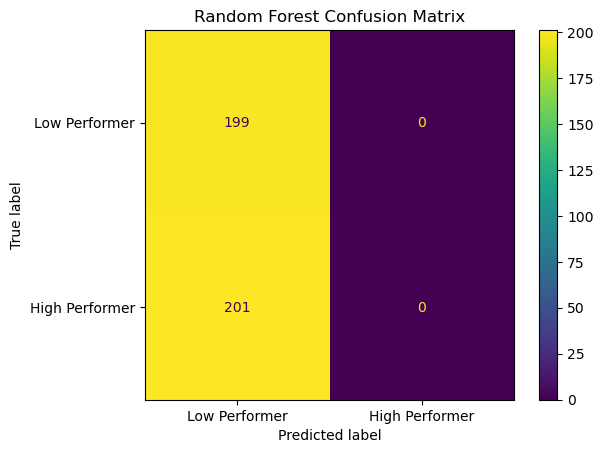

In [77]:
# Confusion Matrices
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, display_labels=['Low Performer', 'High Performer'])
plt.title("Random Forest Confusion Matrix")
plt.show()

***The confusion matrix also shows class imbalance in predictions as the Random Forest model predicts all instances as "Low Performer" regardless of the true label***. This behavior indicates that the model is biased toward the majority class, that is, "Low Performer". This way, the model fails entirely to predict any "High Performer" instances correctly (201 False Negatives). Conversely, every actual "Low Performer" instance is correctly identified (199 True Negatives, no False Positives). As shown, the "High Performer" class has no correct predictions, which results in 0 Precision, Recall, and F1-score for this class (as seen in the classification report earlier).

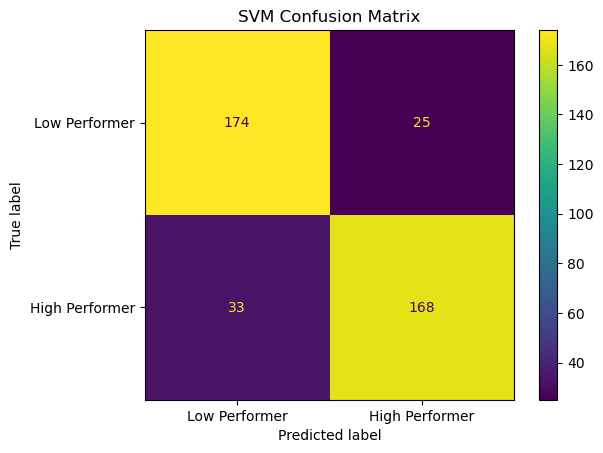

In [78]:
ConfusionMatrixDisplay.from_estimator(best_svm_model, X_test, y_test, display_labels=['Low Performer', 'High Performer'])
plt.title("SVM Confusion Matrix")
plt.show()

As expected, ***the SVM confusion matrix shows balanced classification with the SVM performing well for both "Low Performer" and "High Performer," coupled with comparable precision and recall values***. However, there are still some misclassifications (25 FP and 33 FN), indicating some room to improve the model further. In general, with an accuracy of 85%, the SVM model demonstrates effective classification with balanced results for both classes, making it a more reliable choice compared to the earlier Random Forest performance.

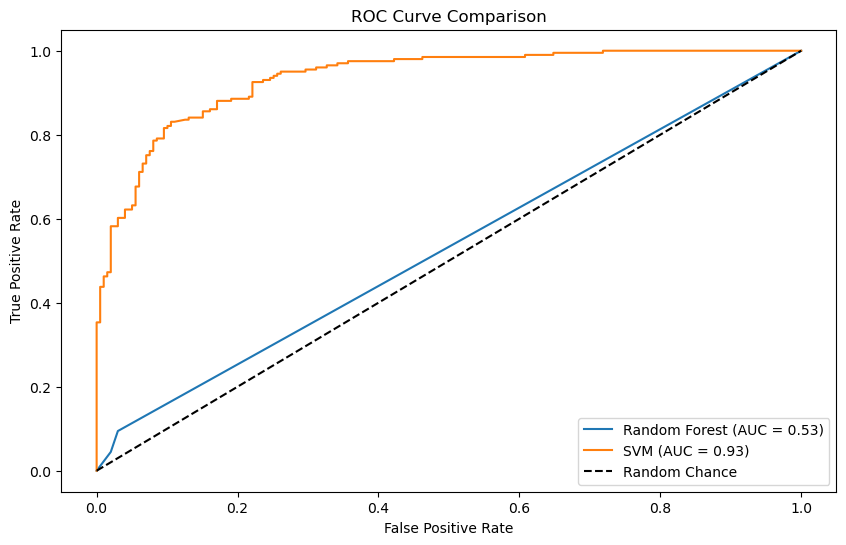

In [144]:
# ROC Curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

The ROC curve for the Random Forest model is very close to the diagonal random guessing line, indicating that the Random Forest struggles to distinguish between the two classes ("Low Performer" and "High Performer"). Conversely, the AUC of 0.93 for SVM, indicates excellent performance in distinguishing between classes. The yellow curve shows that the model achieves high True Positive Rates with low False Positive Rates, meaning it makes fewer mistakes when predicting the positive class. ***In conclusion, the SVM model vastly outperforms the Random Forest, as evident from the much higher AUC value (0.93 vs. 0.53) and its superior curve shape.***

# Conclusion

For this CA, I studied student scores dataset that collects academic and personal information from 2000 students. For the machine learning techniques in predicting the derived target variable "final_grade" all non-numeric variables were removed. Then, the regression analysis was conducted to compare a linear regression and a random forest algorithms in assessing the most relevant (important) variables for predicting the target variable. The Random Forest model performed much better than the linear regression model, which seemed overfitting as its R squared was 100%, which is unrealistic. Conversely, the Random Forest model performed really well with a R squared of 92%. 

In the classification task, a binary variable "performance_category" was created and two models Random Forest and SVM were applied. As illustrated by ROC curve and AUC values, as well as, Accuracy, Precision, Recall, and F1-Scores, the SVM model vastly outperformed the Random Forest. The Random Forest struggled to distinguish between the two classes ("Low Performer" and "High Performer" while the SVM showed excellent performance in distinguishing between classes.